# Comparing Clustering Algorithms

## Importing Libraries

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('lung_cancer.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [35]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,499.50,37.17,1.40,3.84,4.56,5.16,4.84,4.58,4.38,4.49,...,4.86,3.86,3.86,4.24,3.78,3.75,3.92,3.54,3.85,2.93
std,288.82,12.01,0.49,2.03,2.62,1.98,2.11,2.13,1.85,2.14,...,2.43,2.24,2.21,2.29,2.04,2.27,2.39,1.83,2.04,1.47
min,0.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,249.75,27.75,1.00,2.00,2.00,4.00,3.00,2.00,3.00,2.00,...,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
50%,499.50,36.00,1.00,3.00,5.00,6.00,5.00,5.00,4.00,4.00,...,4.00,3.00,3.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00
75%,749.25,45.00,2.00,6.00,7.00,7.00,7.00,7.00,6.00,7.00,...,7.00,5.00,6.00,6.00,5.00,5.00,5.00,5.00,6.00,4.00
max,999.00,73.00,2.00,8.00,8.00,8.00,8.00,7.00,7.00,7.00,...,9.00,9.00,8.00,9.00,8.00,8.00,9.00,7.00,7.00,7.00


In [36]:
# stats of categorical data
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

if not categorical_columns.empty:
    categorical_description = df[categorical_columns].describe()
    print(round(categorical_description, 2))
else:
    print("No categorical columns found in the DataFrame.")

       Patient Id Level
count        1000  1000
unique       1000     3
top            P1  High
freq            1   365


## Handling Missing Data

In [37]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [38]:
def handle_missing_data(df):
    """
    Replaces NaN values in numerical columns with the mean of the respective columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns to handle missing data.
    
    Returns:
    pd.DataFrame: A DataFrame with missing numerical data replaced by column means.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numerical_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    
    return df

df = handle_missing_data(df)

# Label Encoding

In [39]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [40]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [41]:
def encode_categorical_columns(df):
    """
    Encodes all categorical columns in the DataFrame using LabelEncoder.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with categorical columns to be encoded.
    
    Returns:
    pd.DataFrame: A DataFrame with all categorical columns encoded.
    """
    enc = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        df[column] = enc.fit_transform(df[column])
    
    return df

# Encode the categorical columns
df = encode_categorical_columns(df)

# Checking the Dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     1000 non-null   int64
 1   Patient Id                1000 non-null   int32
 2   Age                       1000 non-null   int64
 3   Gender                    1000 non-null   int64
 4   Air Pollution             1000 non-null   int64
 5   Alcohol use               1000 non-null   int64
 6   Dust Allergy              1000 non-null   int64
 7   OccuPational Hazards      1000 non-null   int64
 8   Genetic Risk              1000 non-null   int64
 9   chronic Lung Disease      1000 non-null   int64
 10  Balanced Diet             1000 non-null   int64
 11  Obesity                   1000 non-null   int64
 12  Smoking                   1000 non-null   int64
 13  Passive Smoker            1000 non-null   int64
 14  Chest Pain                1000 non-null  

In [43]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [44]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,1,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,2,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,3,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,4,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


# Data Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
# Select relevant features for clustering
all_features = df.columns
selected_features = []
X = df[all_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA

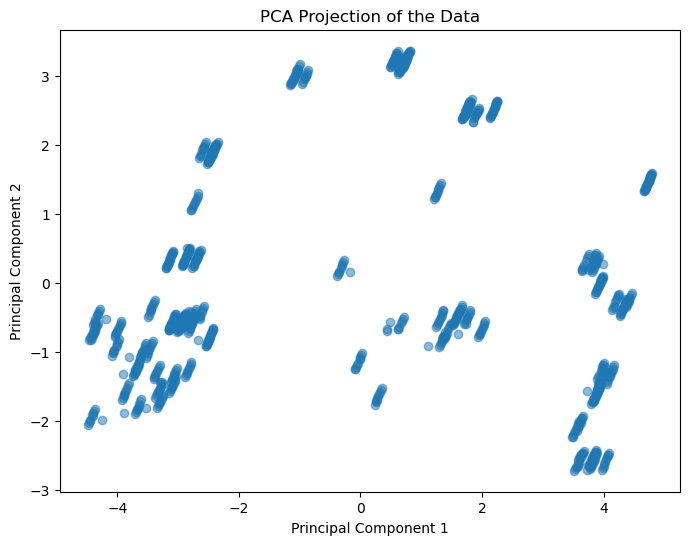

In [47]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Algorithms

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [49]:
# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Custom scorer for Davies-Bouldin score
def davies_bouldin_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return -davies_bouldin_score(X, labels)  # Negative because GridSearchCV maximizes the score

In [50]:
kmeans_params = {
    'n_clusters': range(2, 7),
    'init': ['k-means++'],
    'n_init': [10, 20, 30]
}

kmeans = KMeans(random_state=42)
kmeans_grid = GridSearchCV(kmeans, kmeans_params, scoring=silhouette_scorer, cv=5)
kmeans_grid.fit(X_pca)

print("Best KMeans parameters:", kmeans_grid.best_params_)
print("Best KMeans silhouette score:", kmeans_grid.best_score_)

Best KMeans parameters: {'init': 'k-means++', 'n_clusters': 6, 'n_init': 10}
Best KMeans silhouette score: 0.6506150683445736


In [51]:
dbscan_params = {
  'eps': np.arange(0.1, 1.1, 0.1),
  'min_samples': range(2, 11),
}

dbscan = DBSCAN()
dbscan_grid = GridSearchCV(dbscan, dbscan_params, scoring=silhouette_scorer, cv=5)
dbscan_grid.fit(X_pca)

print("Best DBSCAN parameters:", dbscan_grid.best_params_)
print("Best DBSCAN silhouette score:", dbscan_grid.best_score_)

Best DBSCAN parameters: {'eps': 0.2, 'min_samples': 2}
Best DBSCAN silhouette score: 0.757616918516416


In [52]:
agg_params = {
    'n_clusters': range(2, 7),
    'linkage': ['ward', 'complete', 'average'],
    'affinity': ['euclidean', 'manhattan'],
}

agg = AgglomerativeClustering()
agg_grid = GridSearchCV(agg, agg_params, scoring=silhouette_scorer, cv=5)
agg_grid.fit(X_pca)

print("Best Agglomerative Clustering parameters:", agg_grid.best_params_)
print("Best Agglomerative Clustering silhouette score:", agg_grid.best_score_)

Best Agglomerative Clustering parameters: {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 6}
Best Agglomerative Clustering silhouette score: 0.6506150683445736


In [53]:
spectral_params = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['rbf', 'nearest_neighbors'],
    'gamma': [0.1, 0.5, 1.0],
    'assign_labels': ['kmeans', 'discretize'],
}

spectral = SpectralClustering(random_state=42)
spectral_grid = GridSearchCV(spectral, spectral_params, scoring=silhouette_scorer, cv=5)
spectral_grid.fit(X_pca)

print("Best Spectral Clustering parameters:", spectral_grid.best_params_)
print("Best Spectral Clustering silhouette score:", spectral_grid.best_score_)

Best Spectral Clustering parameters: {'affinity': 'rbf', 'assign_labels': 'discretize', 'gamma': 1.0, 'n_clusters': 5}
Best Spectral Clustering silhouette score: 0.6219419699442993


In [54]:
# Set a global random seed
np.random.seed(42)

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Define clustering algorithms and parameters
algorithms = {
    'KMeans': KMeans(**kmeans_grid.best_params_),
    'DBSCAN': DBSCAN(**dbscan_grid.best_params_),
    'AgglomerativeClustering': AgglomerativeClustering(**agg_grid.best_params_),
    'SpectralClustering': SpectralClustering(**spectral_grid.best_params_),
}

# Evaluate clustering performance
results = []
for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, labels)
        davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
        results.append({'Algorithm': name, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin_avg})
    except Exception as e:
        results.append({'Algorithm': name, 'Silhouette Score': 'Error: ' + str(e), 'Davies-Bouldin Score': 'Error: ' + str(e)})

# Print results
df_results = pd.DataFrame(results)
print(df_results)

                 Algorithm  Silhouette Score  Davies-Bouldin Score
0                   KMeans          0.651395              0.507716
1                   DBSCAN          0.648761              0.426652
2  AgglomerativeClustering          0.651395              0.507716
3       SpectralClustering          0.614512              0.565338
